# PPMtools: Entrainment analysis

In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/user/andrassy/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg
from nugridpy import utils
cb = utils.colourblind

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
yprof_paths = {'D2':'/data/ppm_rpod2/YProfiles/O-shell-M25/D2/', \
               'E10':'/data/ppm_rpod2/YProfiles/RAWD/E10/', \
               'F4':'/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/'}
yprofs = {rid:ppm.yprofile(path) for rid, path in yprof_paths.items()}

rprof_paths = {'M12':'/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/', \
               'N3':'/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/'}
rp_sets = {rid:ppm.RprofSet(path) for rid, path in rprof_paths.items()}

run_data = {**yprofs, **rp_sets}

Reading attributes from file  YProfile-01-1959.bobaaa
There are 1960 YProfile files in the /data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/ directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
Reading attributes from file  YProfile-01-0426.bobaaa
There are 427 YProfile files in the /data/ppm_rpod2/YProfiles/RAWD/E10/ directory.
Ndump values range from 0 to 426
Time values range from 106.86 to 23028.4
Reading attributes from file  YProfile-01-0163.bobaaa
There are 164 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D2/ directory.
Ndump values range from 0 to 163
Time values range from 0.0 to 1640.0
400 rprof files found in '/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/.
Dump numbers range from 0 to 399.
Reading history file '/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/LZRAWD01152-0000.hstry'.
492 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/.
Dump num

## boundary_radius()

This method can find the boundary radius as defined by a local minimum or maximum in the gradient of a variable or by searching for a certain value of a variable (e.g. FV = 0.5). The method can also return the scale height of that variable at the boundary, which entrainment_rate() makes use of.

### D2

We use our standard boundary definition for run D2: the boundary is where the gradient of the tangential velocity is the steepest. This is where the gradient reaches a local minimum at the upper boundary (the velocity decreases with radius).

<IPython.core.display.Javascript object>


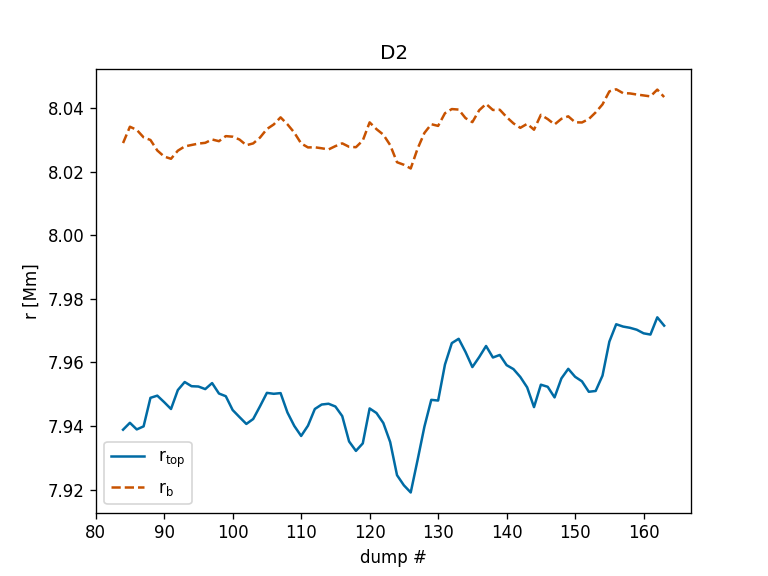

In [13]:
rid = 'D2'
dumps = range(84, 164, 1)
r_min = 7.5
r_max = 8.5
var = 'ut'
criterion = 'min_grad'
rb, H = run_data[rid].boundary_radius(dumps, r_min, r_max, var=var, \
                                      criterion=criterion, 
                                      return_var_scale_height=True)
offset = -1.
rt = rb + offset*np.abs(H)
ifig=1; plt.close(ifig); plt.figure(ifig)
plt.plot(dumps, rt, '-', color=cb(5), label=r'r$_\mathrm{top}$')
plt.plot(dumps, rb, '--', color=cb(8), label=r'r$_\mathrm{b}$')
plt.legend(loc=0)
plt.xlabel('dump #')
plt.ylabel('r [Mm]')
plt.title(rid)

### M12

We use an alternative boundary radius definition in run M12: we define it as the radius where the gradient in FV reaches a local maximum.

<IPython.core.display.Javascript object>


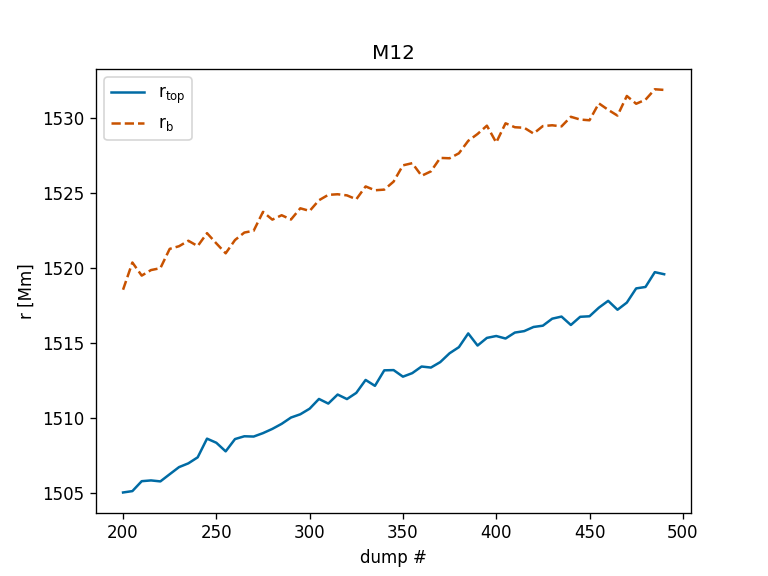

In [14]:
rid = 'M12'
dumps = range(200, 492, 5)
r_min = 1450.
r_max = 1600.
var = 'FV'
criterion = 'max_grad'
rb, H = run_data[rid].boundary_radius(dumps, r_min, r_max, var=var, \
                                      criterion=criterion, 
                                      return_var_scale_height=True)
offset = -1.
rt = rb + offset*np.abs(H)
ifig=2; plt.close(ifig); plt.figure(ifig)
plt.plot(dumps, rt, '-', color=cb(5), label=r'r$_\mathrm{top}$')
plt.plot(dumps, rb, '--', color=cb(8), label=r'r$_\mathrm{b}$')
plt.legend(loc=0)
plt.xlabel('dump #')
plt.ylabel('r [Mm]')
plt.title(rid)

## entrainment_rate()

### D2

Simple case, no burning.

Computing boundary radius...
Done.
Integrating entrained mass...
80/80 cycles processed.
Done.


<IPython.core.display.Javascript object>


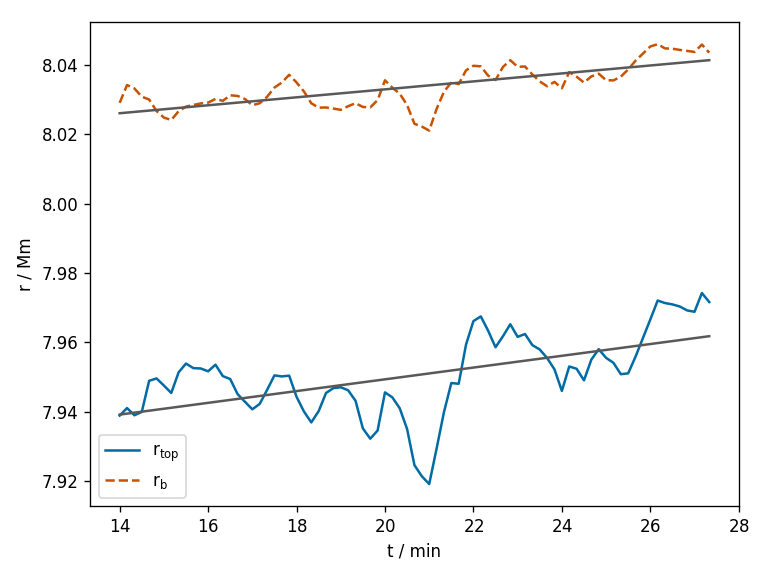

rb is the radius of the convective boundary.
drb/dt = 1.91e-02 km/s

rt is the upper limit for mass integration.
drt/dt = 2.83e-02 km/s


<IPython.core.display.Javascript object>


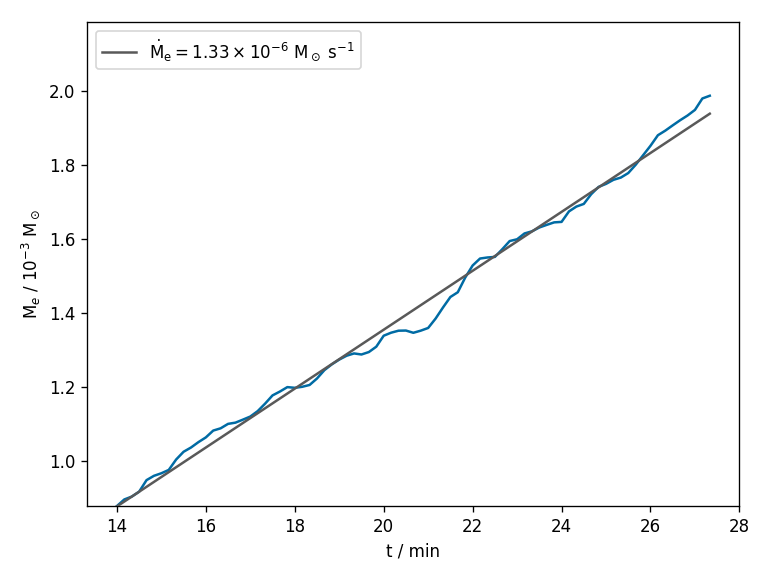

Resolution: 1536^3
mtot_fc =  [  1.32618507e-06  -2.36845356e-04]
Entrainment rate: 1.326e-06 M_Sun/s


In [15]:
rid = 'D2'
dumps = range(84, 164, 1)
r_min = 7.5
r_max = 8.5
var = 'ut'
criterion = 'min_grad'
offset = -1.
_ = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                   criterion=criterion, \
                                   offset=offset, ifig0=3)

### M12

Simple case, no burning.

Computing boundary radius...
Done.
Integrating entrained mass...
59/59 cycles processed.
Done.


<IPython.core.display.Javascript object>


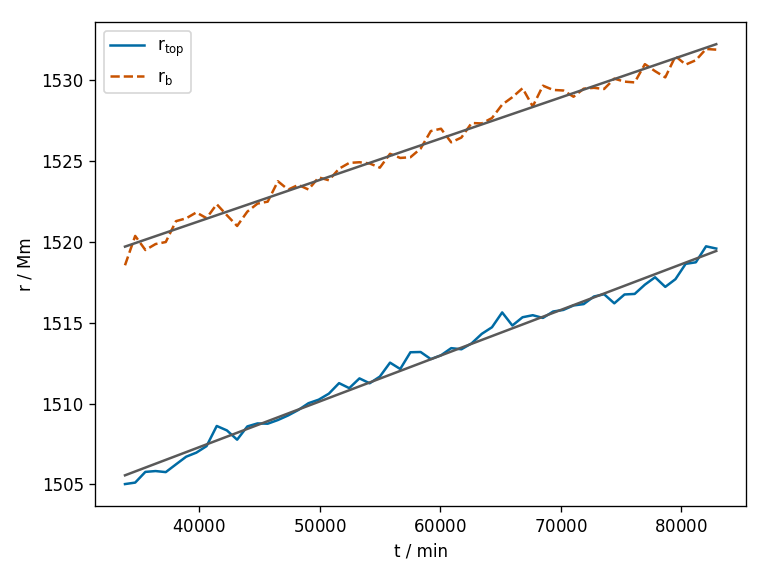

rb is the radius of the convective boundary.
drb/dt = 4.26e-03 km/s

rt is the upper limit for mass integration.
drt/dt = 4.72e-03 km/s


<IPython.core.display.Javascript object>


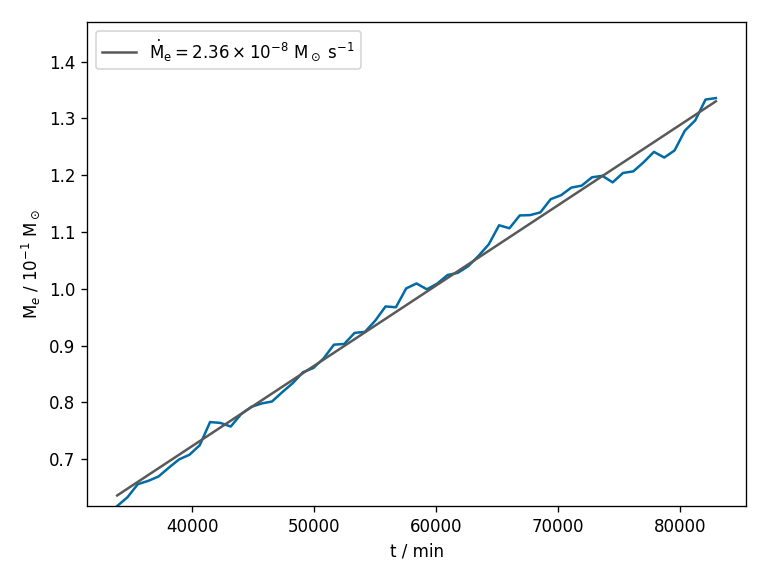

Resolution: 1536^3
mtot_fc =  [  2.35590508e-08   1.58025313e-02]
Entrainment rate: 2.356e-08 M_Sun/s


In [16]:
rid = 'M12'
dumps = range(200, 492, 5)
r_min = 1450.
r_max = 1600.
var = 'FV'
criterion = 'max_grad'
offset = -1.
_ = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                   criterion=criterion, \
                                   offset=offset, ifig0=5)

# N3

Run N3 includes H burning with a temperature correction. The user has to specify burn_func, which is a function that computes the mass burning rate per unit volume as a function of radius. The first argument of this function must be the cycle (dump) number and the remaining parameters are specified in burn_args.

Computing boundary radius...
Done.
Integrating entrained mass...
80/80 cycles processed.
Done.


<IPython.core.display.Javascript object>


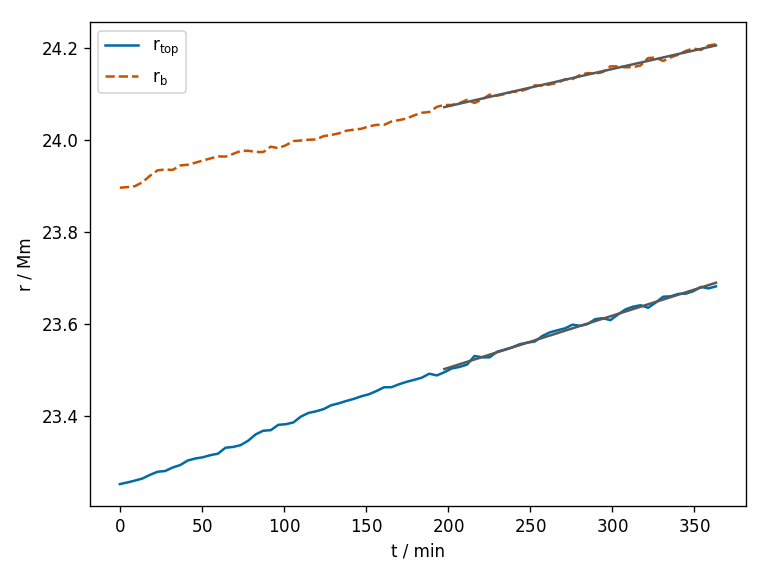

rb is the radius of the convective boundary.
drb/dt = 1.35e-02 km/s

rt is the upper limit for mass integration.
drt/dt = 1.89e-02 km/s


<IPython.core.display.Javascript object>


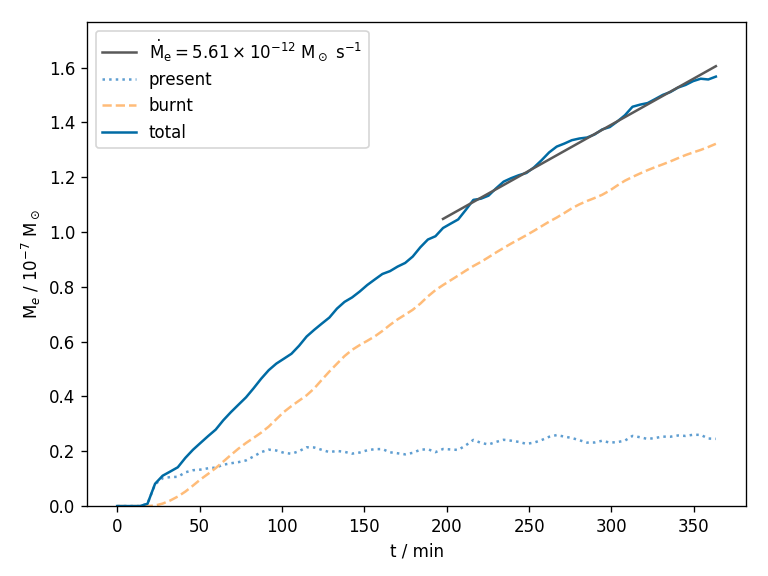

Resolution: 1152^3
mtot_fc =  [  5.60905506e-12   3.82123325e-08]
Entrainment rate: 5.609e-12 M_Sun/s


In [17]:
rid = 'N3'
dumps = range(0, 400, 5)
r_min = 22.
r_max = 26.
var = 'FV'
criterion = 'max_grad'
offset = -2.
fit_interval = 60.*np.array([200., 370.])
burn_func = run_data[rid].compute_rhodot_C12pg
T9corr_params = {'kind':1, 'params':{'a':0.46, 'b':0.77}}
burn_args = {'T9corr_params':T9corr_params}
res = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                     criterion=criterion, \
                                     burn_func=burn_func, \
                                     burn_args=burn_args, offset=offset, \
                                     fit_interval=fit_interval, ifig0=7)

# E10

This is a PPMstar 1.0 run, so the properties of the two fluids have to be specified in burn_args.

Computing boundary radius...
Done.
Integrating entrained mass...
56/56 cycles processed.
Done.


<IPython.core.display.Javascript object>


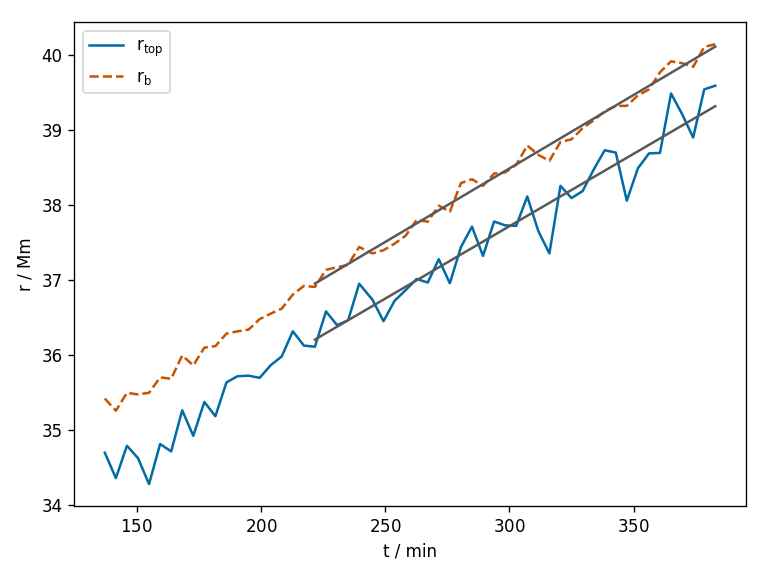

rb is the radius of the convective boundary.
drb/dt = 3.27e-01 km/s

rt is the upper limit for mass integration.
drt/dt = 3.22e-01 km/s


<IPython.core.display.Javascript object>


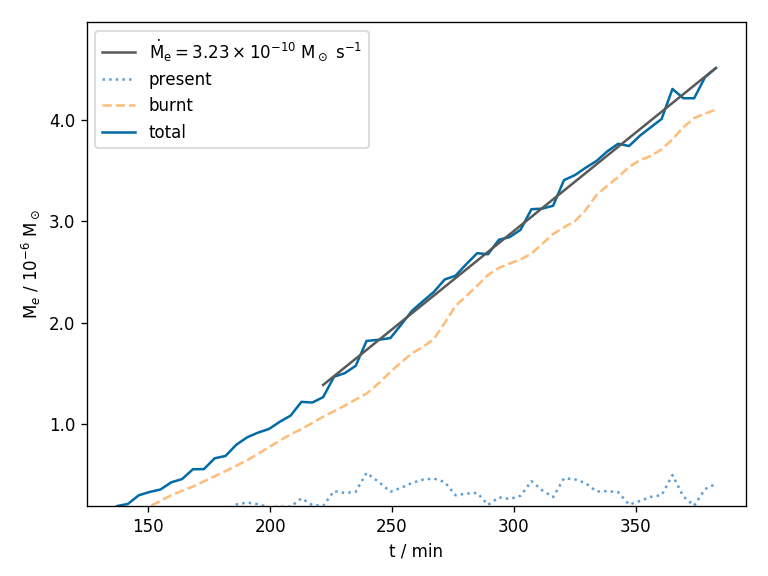

Resolution: 1536^3
mtot_fc =  [  3.23245906e-10  -2.91437837e-06]
Entrainment rate: 3.232e-10 M_Sun/s


In [18]:
rid = 'E10'
dumps = range(150, 427, 5)
r_min = 32.
r_max = 42.
var = 'ut'
criterion = 'min_grad'
offset = -1.
fit_interval = 60.*np.array([220., 400.])
burn_func = run_data[rid].compute_rhodot_C12pg
T9corr_params = {'kind':1, 'params':{'a':0.6, 'b':0.85}}
burn_args = {'T9corr_params':T9corr_params, \
             'airmu':1.4, \
             'cldmu':0.3, \
             'fkair':0.203606102635, \
             'fkcld':0.885906040268, \
             'atomicnoair':6.65742024965, \
             'atomicnocld':1.34228187919}
res = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                     criterion=criterion, \
                                     burn_func=burn_func, \
                                     burn_args=burn_args, offset=offset, \
                                     fit_interval=fit_interval, ifig0=9)

# F4

F4 is a more complicated case, because H burning in this run was off in the first 616 dumps and on afterwards. We define a custom burn_func(), which receives the data object as well as all burning parameters via burn_args. In principle, one could define burn_func() that computes the total of two different reactions in the same way.

Computing boundary radius...
Done.
Integrating entrained mass...
130/130 cycles processed.
Done.


<IPython.core.display.Javascript object>


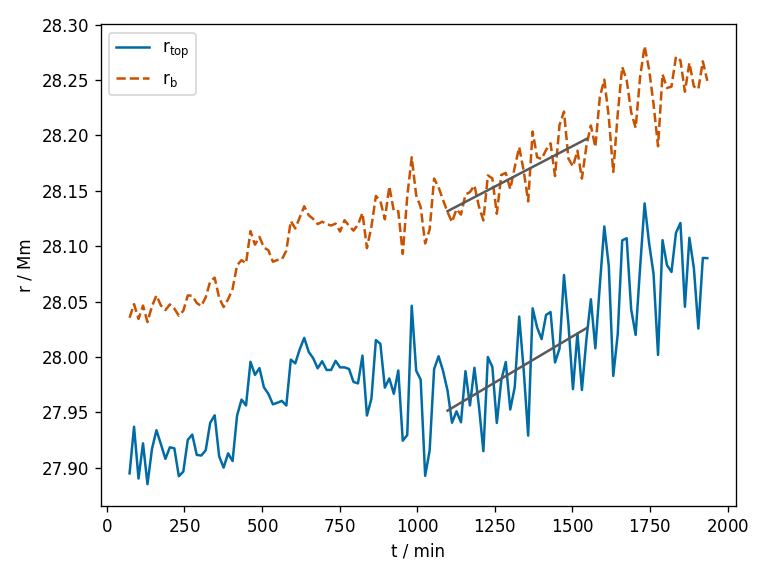

rb is the radius of the convective boundary.
drb/dt = 2.43e-03 km/s

rt is the upper limit for mass integration.
drt/dt = 2.77e-03 km/s


<IPython.core.display.Javascript object>


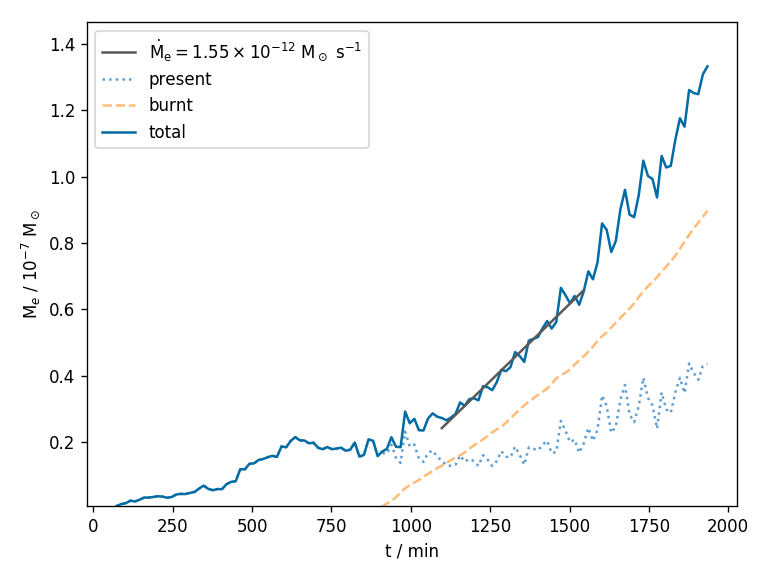

Resolution: 1536^3
mtot_fc =  [  1.54958559e-12  -7.79035384e-08]
Entrainment rate: 1.550e-12 M_Sun/s


In [19]:
rid = 'F4'
dumps = range(50, 1350, 10)
r_min = 27.7
r_max = 28.5
var = 'ut'
criterion = 'min_grad'
offset = -1.
fit_interval = 60.*np.array([1100., 1550.])
burn_args = {'data_object':run_data[rid], \
             'airmu':1.39165, \
             'cldmu':0.725, \
             'fkair':0.203606102635, \
             'fkcld':0.885906040268, \
             'atomicnoair':6.65742024965, \
             'atomicnocld':1.34228187919}

def burn_func(cycle, **kwargs):
    r = kwargs['data_object'].get('Y', 0, resolution='l')
    burn_rate = np.zeros(len(r))
    data_object = kwargs['data_object']
    burn_args = dict(kwargs)
    del burn_args['data_object']
    if cycle > 620:
        burn_rate = data_object.compute('rhodot_C12pg', cycle, \
                                        extra_args=burn_args)
    
    return burn_rate

res = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                   criterion=criterion, burn_func=burn_func, \
                                   burn_args=burn_args, offset=offset, \
                                   fit_interval=fit_interval, ifig0=11)